Задача - собрать все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

Данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:

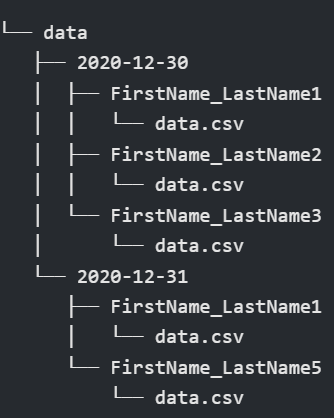

In [33]:
import pandas as pd
import os 

In [34]:
tree = os.walk('data')
data_files = []
target_file = 'data.csv'

# путь, папки, файлы
for item in tree:
    files = item[-1]
    
    # если папка содержит файлы и первый файл data.csv
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_files.append(path)

In [35]:
data_files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col=0)
    date, name = path.split('/')[2:4]
    df['name'] = name
    df['date'] = date
    data_files_df.append(df)

In [36]:
data_files_df[0].head()

,product_id,quantity,name,date
0,36,4,Rostislav_Petrov,2020-12-08
1,24,2,Rostislav_Petrov,2020-12-08
2,23,1,Rostislav_Petrov,2020-12-08
3,27,5,Rostislav_Petrov,2020-12-08
4,32,3,Rostislav_Petrov,2020-12-08


In [37]:
data = pd.concat(data_files_df, ignore_index=True)

In [32]:
data

,product_id,quantity,name,date
0,36,4,Rostislav_Petrov,2020-12-08
1,24,2,Rostislav_Petrov,2020-12-08
2,23,1,Rostislav_Petrov,2020-12-08
3,27,5,Rostislav_Petrov,2020-12-08
4,32,3,Rostislav_Petrov,2020-12-08
...,...,...,...,...
156,79,3,Anton_Smirnov,2020-12-09
157,33,1,Anton_Smirnov,2020-12-09
158,81,3,Anton_Smirnov,2020-12-09
159,70,4,Anton_Smirnov,2020-12-09
